### import modules 

In [2]:
# import modules of interest 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import mnist
import pylab
import copy
from decimal import *

sns.set()

# setup jupyter notebook 
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### define functions for code

In [3]:

# data loading function
def load_dataset():
    mndata = mnist.MNIST('./python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    labels_train = labels_train.astype('int')
    labels_test = labels_test.astype('int')
    return X_train, X_test,labels_train,labels_test

# extract the 2's and 7's, conver to -1 and 1 values 
def convert_2_7(x_train,x_test,labels_train,labels_test):
    #import pdb; pdb.set_trace()
    mask_train = np.logical_or(labels_train==2,labels_train==7)
    mask_test = np.logical_or(labels_test==2,labels_test==7)
   # mask_train = labels_train==2 or labels_train==7
    #mask_test = labels_test==2 or labels_test==7
    
    x_train_c = x_train[mask_train]
    x_test_c = x_test[mask_test]
    

    labels_train_c = labels_train[mask_train]
    labels_test_c = labels_test[mask_test]
    
    labels_train_c[labels_train_c==2] = -1
    labels_train_c[labels_train_c==7] = 1

    labels_test_c[labels_test_c==2] = -1
    labels_test_c[labels_test_c==7] = 1

    return x_train_c,x_test_c,labels_train_c,labels_test_c 

# implement the gradient method 
def gradient_method(X,y,X_test,y_test,lambda_val):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    #step_size = 1e-3
    #step_size = 3e-2
    step_size = 1e-1
    criteria_conv = 0.000004

    
    # do one run through first after being initialized to zero 
    w = np.zeros((np.shape(X)[1],))
    b = 0

    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y*(b+np.dot(X,w))) 
    
    # calculate cost function on training
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)

    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classification
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)
    
    while not_conv:
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y.T*(b+np.dot(X,w)))) 

        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
        g_b = (1/n)*np.sum(-y*(1-mu_vec))

        # 
        w = w_old - step_size*g_w
        b = b_old - step_size*g_b

        w_vec.append(w)
        b_vec.append(b)
        
        cost_mu = 1+np.exp(-y*(b+np.dot(X,w)))
        j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
        ####### testing part

        mu_vec = 1/(1+np.exp(-y_test*(b+np.dot(X_test,w)))) 
        cost_mu = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)

        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        #### classification
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)
        
        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)
        
        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)

        # check convergence
        if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            not_conv = False

        else:
            not_conv = True
            k += 1

        print('the value of j train is {}'.format(j_train))

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec

# implement stochastic gradient descent, batch_size determines how many examples are in each run. 
def SGD_old(X,y,X_test,y_test,lambda_val,batch_size):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    #step_size = 1e-3
    step_size = 5e-2
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0
    
    ##### gradient descent batch size choice
    batch_range = np.arange(np.shape(X)[0])
    
    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)

    while not_conv:
        # stochastic choice
        np.random.shuffle(batch_range)

        inds_choose = np.random.choice(batch_range,size=batch_size,replace=False)
        X_sub = X[inds_choose,:]
        y_sub = y[inds_choose]
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y_sub.T*(b+np.dot(X_sub,w)))) 

        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        #g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*lambda_val*w
        g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*(batch_size/n)*lambda_val*w
        g_b = (1/batch_size)*np.sum(-y_sub*(1-mu_vec))

        # 
        w = w_old - step_size*g_w
        b = b_old - step_size*g_b

        cost_mu = 1+np.exp(-y_sub.T*(b+np.dot(X_sub,w)))
        j_train = (1/batch_size)*(np.sum(np.log(cost_mu))) + 2*(batch_size/n)*lambda_val*np.dot(w.T,w)
        print('the value of j train is {}'.format(j_train))

        ####### testing part

        cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

        w_vec.append(w)
        b_vec.append(b)

        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        #### classification
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)

        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)

        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)
        # check convergence
       # if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
        #if k>200:
        if k>1000:    
            not_conv = False

        else:
            not_conv = True
            k += 1
            
    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec


# implement newton's method 

def newton_method(X,y,X_test,y_test,lambda_val):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 1
    #step_size = 1e-3
    step_size = 1
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0

    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    #mu_vec = np.zeros((np.shape(X)[0],))
    #cost_mu = np.zeros((np.shape(X)[0],))
    #range_vec = np.arange(len(mu_vec))

    cost_mu = 1+np.exp(-y*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)

    while not_conv:
 
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y*(b+np.dot(X,w))))
        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
        g_b = (1/n)*np.sum(-y*(1-mu_vec))
        
        s_vec = mu_vec*(1-mu_vec)
        diag_sigmoid = np.diag(s_vec)
        identity_lambda = np.identity(np.shape(X)[1])
        h_w = (1/n)*np.dot(X.T,np.dot(diag_sigmoid,X)) + 2*lambda_val*identity_lambda
        h_b = np.sum((1/n)*s_vec)
        
        d_k_w = np.linalg.solve(h_w,-g_w)
        #d_k_b = np.linalg.solve(h_b,-g_b)
        d_k_b = -g_b/h_b

        # 
        w = w_old + step_size*d_k_w
        b = b_old + step_size*d_k_b
        
        cost_mu = 1+np.exp(-y*(b+np.dot(X,w)))     

        j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
        ####### testing part
        cost_mu_test = 1+np.exp(-y_test*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)
                             
        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        
        ###       
        w_vec.append(w)
        b_vec.append(b)
        
        #### classification
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)
        
        print('the value of j train is {}'.format(j_train))
        
        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)
        
        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)
                                
        # check convergence
        if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            not_conv = False

        else:
            not_conv = True
            k += 1

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec


# plot the cost fucntion and misclassification error 
def plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,titl_1):
    
    # plot the cost function vs. iteration
    plt.figure(figsize=(4, 4), dpi=600)
    plt.plot(k_vec,j_train_vec,label='training')
    plt.plot(k_vec,j_test_vec,label='testing')
    plt.xlabel('iteration number')
    plt.ylabel('cost function')
    plt.title(titl_1 + 'Cost function vs. iteration')
    plt.legend()
    index = np.argmin(j_train_vec)
    k_best = k_vec[index]
    w_best = w_vec[index]
    titl_1_save = titl_1[:-2]
    titl_1_save = titl_1_save.replace(" ","_")
    #plt.savefig(titl_1_save + 'cost_func')

    # plot the misclassification error vs. iteration 
    plt.figure(figsize=(4, 4), dpi=600)
    plt.plot(k_vec,train_classify_vec,label='training data')
    plt.plot(k_vec,test_classify_vec,label='test data')
    plt.xlabel('iteration number')
    plt.ylabel('misclassification error')
    plt.title(titl_1 + 'Misclassification error vs. iteration number')
    plt.legend()
    #plt.savefig(titl_1_save + 'mis_class_error')


In [13]:
# implement stochastic gradient descent, batch_size determines how many examples are in each run. 
def SGD(X,y,X_test,y_test,lambda_val,batch_size):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    #step_size = 5e-3
    step_size = 5e-3
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0
    
    ##### gradient descent batch size choice
    batch_range = np.arange(np.shape(X)[0])
    
    n = np.float(np.shape(X)[0])
    batch_size= np.float(batch_size)
    lambda_val = np.float(lambda_val)
    
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = w[:]
    b_old = copy.copy(b)

    while not_conv:
        # stochastic choice
        np.random.shuffle(batch_range)
        for i in np.arange(n/batch_size): 
            inds_choose = batch_range[int(i*batch_size):(int(i*batch_size)+int(batch_size))]
            #inds_choose = np.random.choice(batch_range,size=batch_size,replace=False)
            X_sub = X[inds_choose,:]
            y_sub = y[inds_choose]
            ##### training part 
            #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
            #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
            mu_vec = 1/(1+np.exp(-y_sub*(b+np.dot(X_sub,w)))) 

            #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
            #g_b = (1/n)*np.sum(mu_vec-y)

            #g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*lambda_val*w
            g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec))))+ (
                2*(batch_size/n)*lambda_val*w_old)
            
            g_w[np.abs(g_w)<1e-15] = 0
            
            g_b = (1/batch_size)*np.sum(-y_sub*(1-mu_vec))

            # 
            w = w_old - step_size*g_w
            b = b_old - step_size*g_b
            
            
            #w = np.array(w)
            w_old = w[:]
            b_old = copy.copy(b)
            
            delta_w = np.abs(w-w_old)
            delta_b = np.abs(b-b_old)

            cost_mu = 1+np.exp(-y*(b+np.dot(X,w)))
            j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
            print('the value of j train is {}'.format(j_train))

            ####### testing part

            cost_mu_test = 1+np.exp(-y_test*(b+np.dot(X_test,w)))

            j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

            w_vec.append(w)
            b_vec.append(b)

            k_vec.append(k)
            j_train_vec.append(j_train)
            j_test_vec.append(j_test)

            #### classification
            train_signed = (b+np.dot(X,w))
            test_signed = (b+np.dot(X_test,w))

            train_data_class = np.sign(train_signed)
            test_data_class = np.sign(test_signed)

            train_classify_error_vec = [train_data_class != y]
            test_classify_error_vec = [test_data_class != y_test]

            train_classify_error = np.sum(train_classify_error_vec)/n
            test_classify_error = np.sum(test_classify_error_vec)/n_test

            train_classify_vec.append(train_classify_error)
            test_classify_vec.append(test_classify_error)
            #if k == 600:
            #    import pdb;pdb.set_trace()

            # check convergence
           # if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            if k>1000:
            #if k>3000:    
                not_conv = False
                return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec


            else:
                not_conv = True
                k += 1

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec



### Load and convert data 

In [7]:
x_train,x_test,labels_train,labels_test = load_dataset()

In [8]:
x_train_c,x_test_c,labels_train_c,labels_test_c  = convert_2_7(x_train,x_test,labels_train,labels_test)

In [9]:
lambda_val = 10**-1

### gradient descent method 

In [7]:
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = gradient_method(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val)

the value of j train is 0.6931471805599452
the value of j train is 0.5379555166429868
the value of j train is 0.44722685150492086
the value of j train is 0.3907018481174053
the value of j train is 0.3533361169308339
the value of j train is 0.3273818065158903
the value of j train is 0.30863315480662623
the value of j train is 0.2946643341357162
the value of j train is 0.2839967386619998
the value of j train is 0.275685580144799
the value of j train is 0.26910273083215996
the value of j train is 0.263816424545151
the value of j train is 0.2595213835802457
the value of j train is 0.2559965179337623
the value of j train is 0.25307837506806935
the value of j train is 0.25064394171642035
the value of j train is 0.24859919123269736
the value of j train is 0.24687126889723982
the value of j train is 0.24540304321891648
the value of j train is 0.244149233179919
the value of j train is 0.24307360787433321
the value of j train is 0.24214693006104956
the value of j train is 0.24134542481285437
the

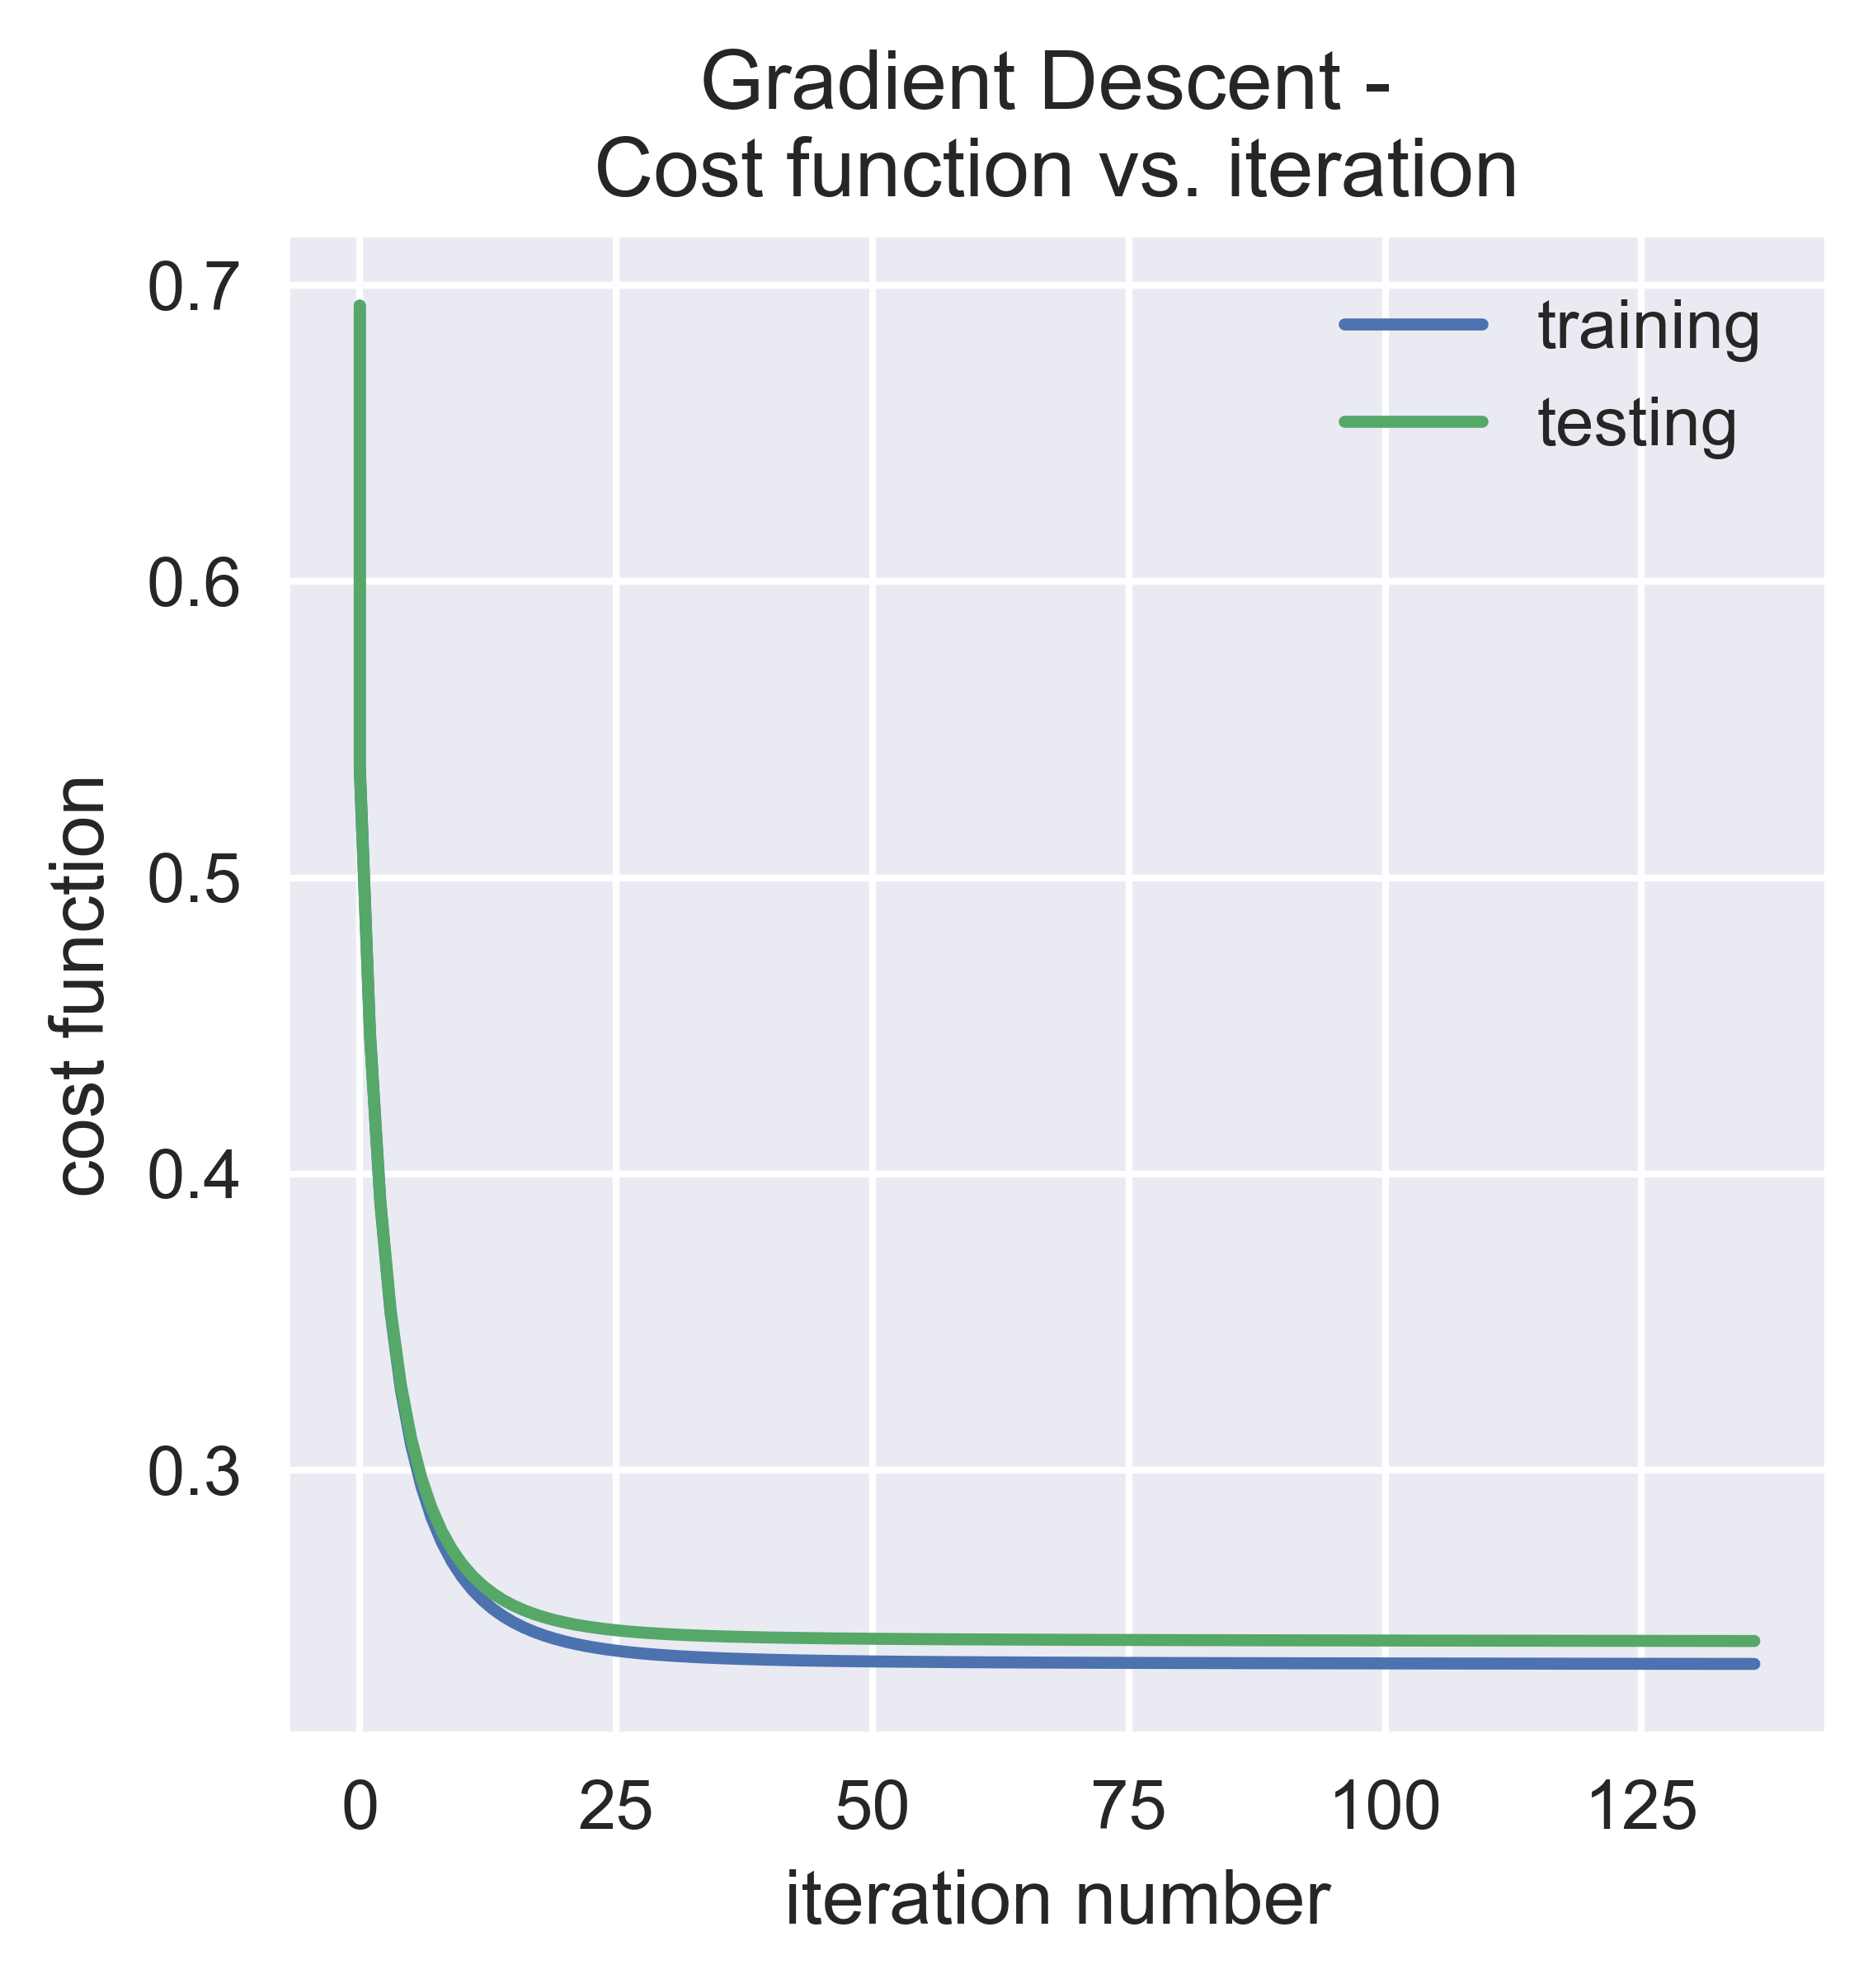

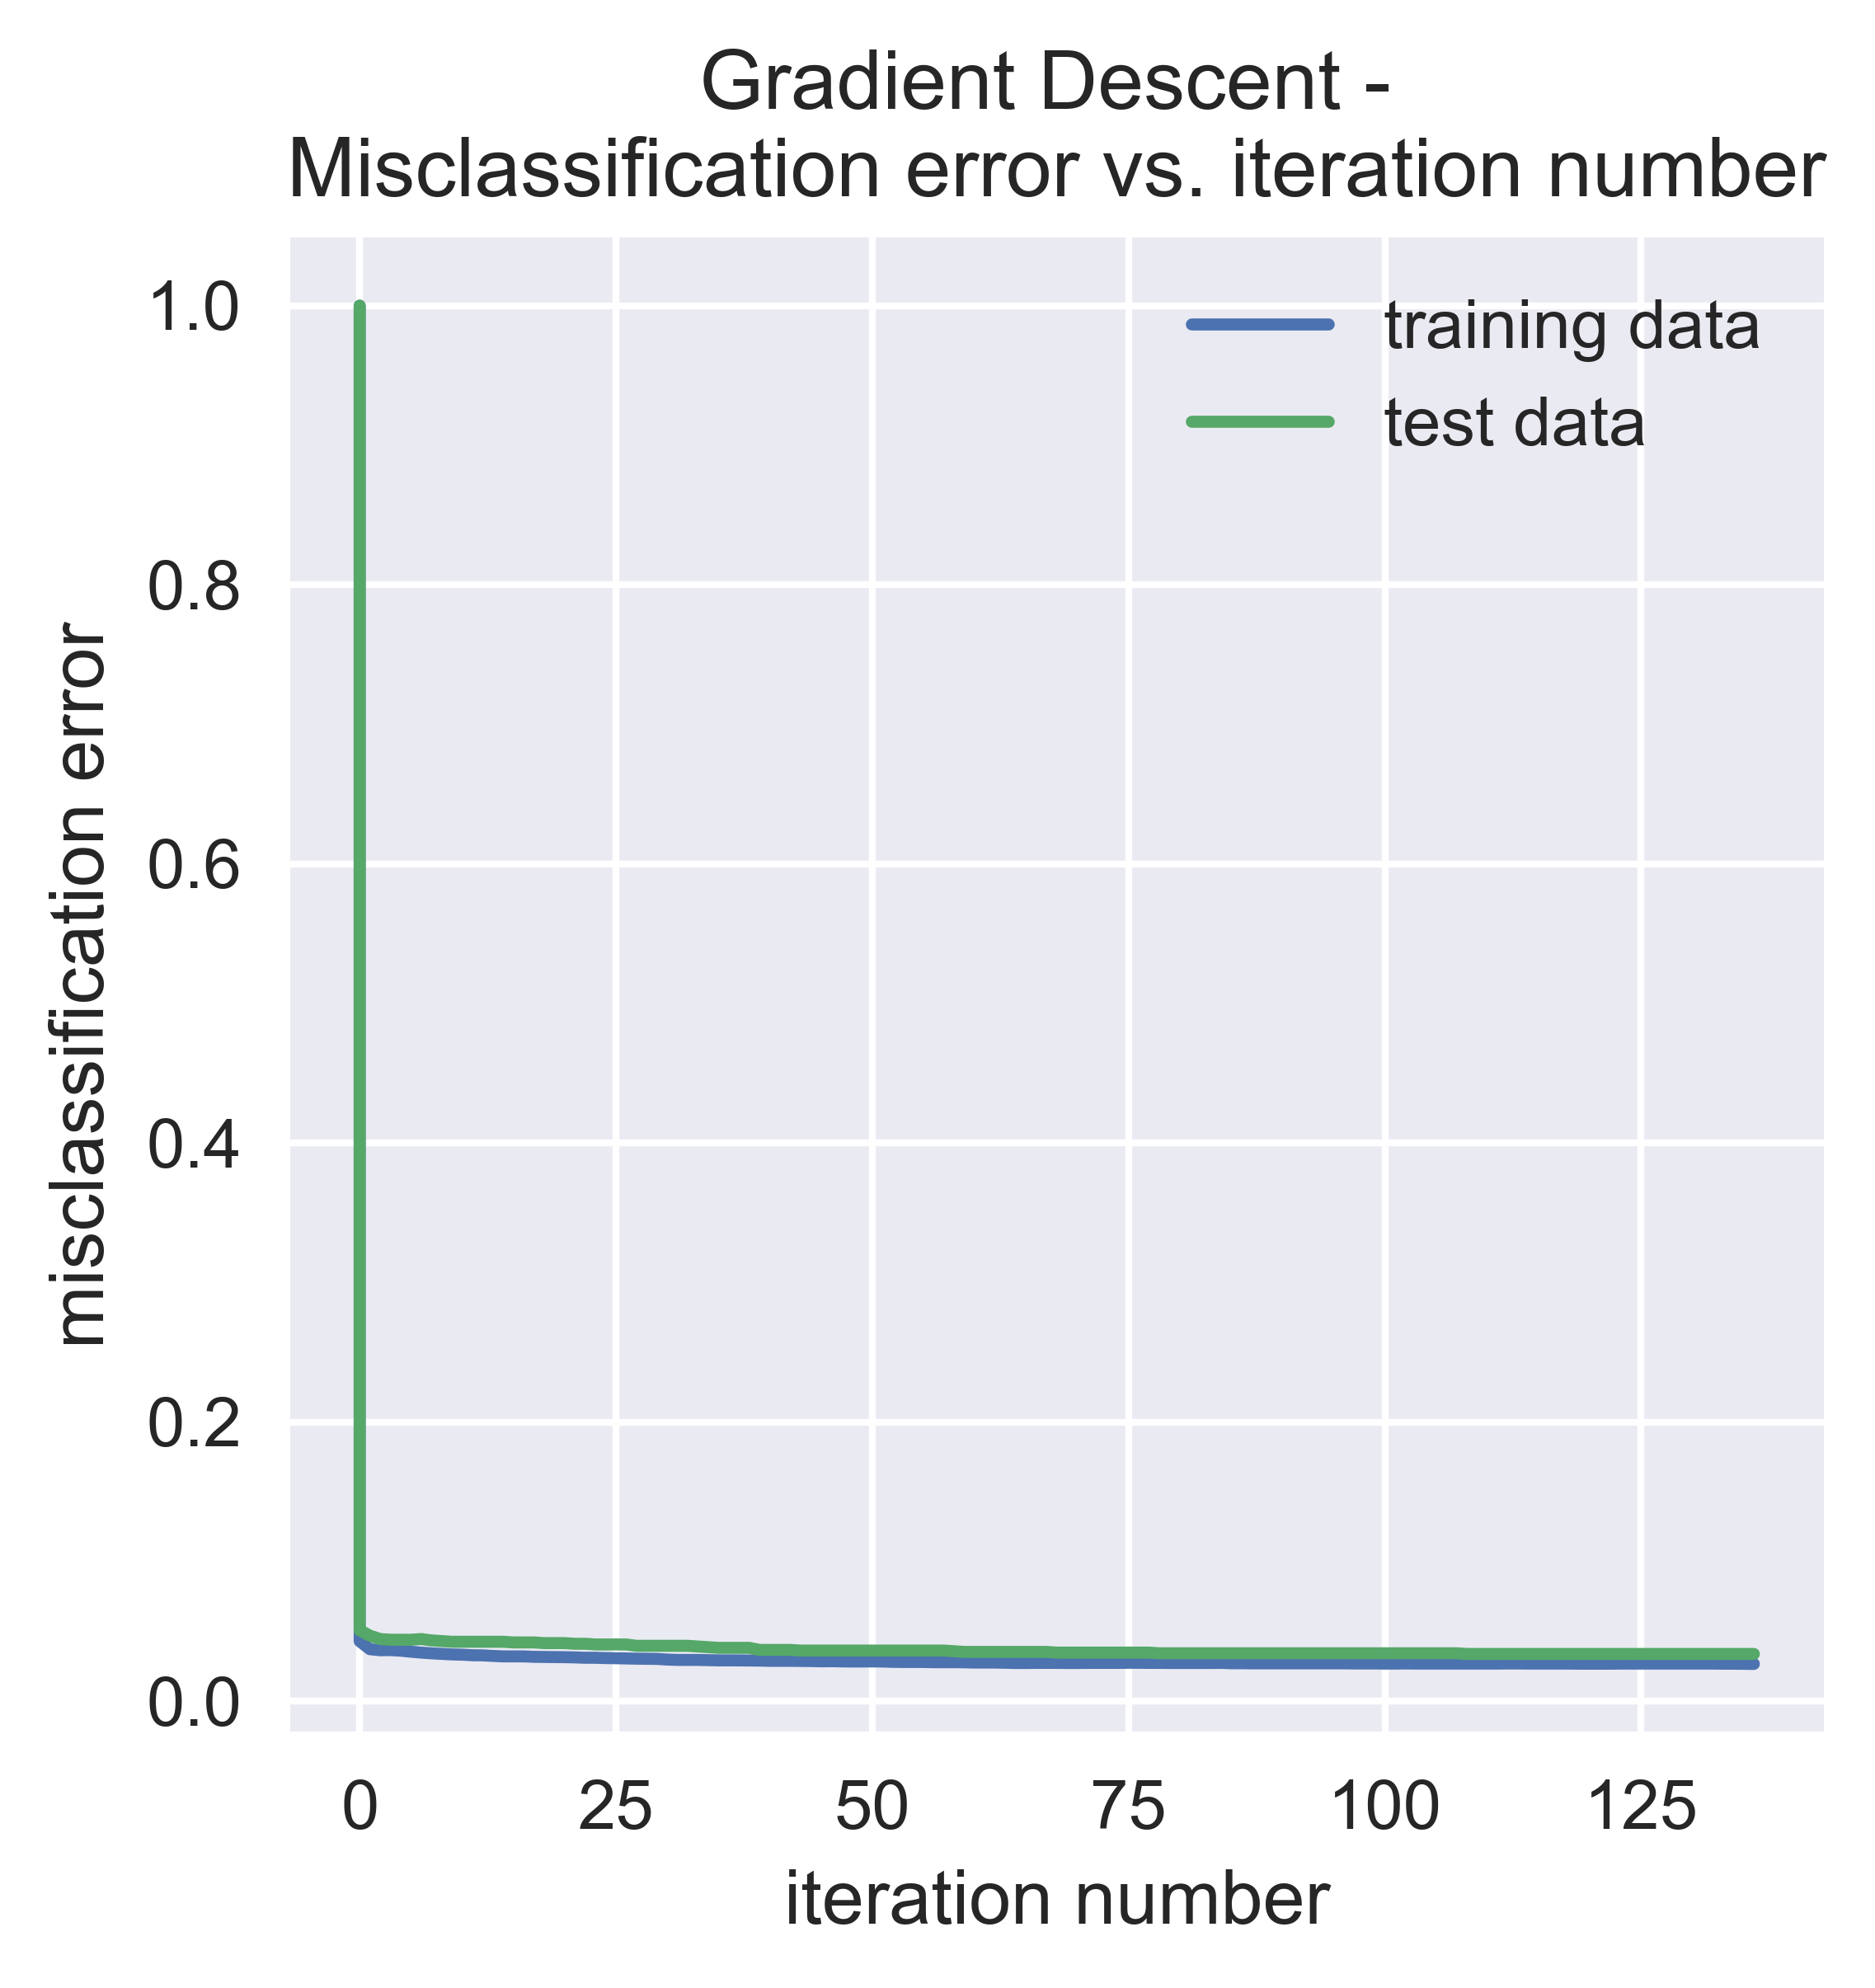

In [8]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Gradient Descent - \n')

### stochastic gradient descent - 1 example

In [14]:
batch_size = 1
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = SGD(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val,batch_size)

the value of j train is 0.6931471805599452
the value of j train is 0.6885769680576671
the value of j train is 0.6844405405378335
the value of j train is 0.6814932395172768
the value of j train is 0.6676886543430657
the value of j train is 0.6619653698215343
the value of j train is 0.6578214644174827
the value of j train is 0.6493599995930589
the value of j train is 0.6363563025598505
the value of j train is 0.6319535670932668
the value of j train is 0.6207263824683147
the value of j train is 0.6136523441793832
the value of j train is 0.6052924418820811
the value of j train is 0.6018573759734637
the value of j train is 0.6004474637094839
the value of j train is 0.5978401525484027
the value of j train is 0.5936069718593456
the value of j train is 0.5899825382200591
the value of j train is 0.5772825865593116
the value of j train is 0.5654613019287343
the value of j train is 0.557210954989437
the value of j train is 0.5554174411402242
the value of j train is 0.5510817077072141
the value of

the value of j train is 0.2618618792134445
the value of j train is 0.2607385498189635
the value of j train is 0.2605645490003182
the value of j train is 0.2617540122456648
the value of j train is 0.26248803567177614
the value of j train is 0.26162048032626056
the value of j train is 0.2600517263302246
the value of j train is 0.2595565046547447
the value of j train is 0.26005606127020625
the value of j train is 0.2601445675844101
the value of j train is 0.2589835325353193
the value of j train is 0.25829771609314034
the value of j train is 0.2575663518269593
the value of j train is 0.2570498463163863
the value of j train is 0.2569410860054523
the value of j train is 0.25637499294138755
the value of j train is 0.25608727540818677
the value of j train is 0.2554647520073823
the value of j train is 0.25522302437889544
the value of j train is 0.25521316158025553
the value of j train is 0.25524600430183536
the value of j train is 0.25568805394879024
the value of j train is 0.255745657383385
th

the value of j train is 0.24016006109566423
the value of j train is 0.2399169225507889
the value of j train is 0.23996363408403384
the value of j train is 0.24026673775599092
the value of j train is 0.24021968050786097
the value of j train is 0.24032257746902805
the value of j train is 0.2405297636909589
the value of j train is 0.24156755870563842
the value of j train is 0.24134180257924265
the value of j train is 0.2408099996723155
the value of j train is 0.24071580109553628
the value of j train is 0.24062595609853282
the value of j train is 0.24046595966824996
the value of j train is 0.24054484720184
the value of j train is 0.24058410842581573
the value of j train is 0.24059408118393488
the value of j train is 0.24045330011863042
the value of j train is 0.24050890423319712
the value of j train is 0.24045819942538488
the value of j train is 0.24036245425929792
the value of j train is 0.24000862253957828
the value of j train is 0.2400350013875308
the value of j train is 0.2400557023427

the value of j train is 0.2501834566942909
the value of j train is 0.2508059171887268
the value of j train is 0.25030597149041134
the value of j train is 0.25039618495520943
the value of j train is 0.25194943622312044
the value of j train is 0.2516936508377154
the value of j train is 0.2517483806408642
the value of j train is 0.2518201636735765
the value of j train is 0.25100049297088545
the value of j train is 0.24781776358448138
the value of j train is 0.24817647922677902
the value of j train is 0.2482406700454464
the value of j train is 0.2482168047474577
the value of j train is 0.24841869419779533
the value of j train is 0.24807939197737494
the value of j train is 0.24844561852392197
the value of j train is 0.2490342242330131
the value of j train is 0.24915981674789822
the value of j train is 0.24948569925732625
the value of j train is 0.24867179657283595
the value of j train is 0.2487653890116727
the value of j train is 0.2492551504591467
the value of j train is 0.2491856776912642

the value of j train is 0.2544104150667167
the value of j train is 0.25444911602223896
the value of j train is 0.25471999211107155
the value of j train is 0.2550174556625485
the value of j train is 0.25504546820217733
the value of j train is 0.25496226605034156
the value of j train is 0.2549905269381472
the value of j train is 0.2550893731092895
the value of j train is 0.25511398861727475
the value of j train is 0.2551961646216474
the value of j train is 0.25532979691830987
the value of j train is 0.2553872846402714
the value of j train is 0.2548309776748853
the value of j train is 0.2549643015747667
the value of j train is 0.2549910929941825
the value of j train is 0.255011426318085
the value of j train is 0.255264408794397
the value of j train is 0.2553052332145279
the value of j train is 0.2553319424127635
the value of j train is 0.25535357081900245
the value of j train is 0.25540553435523083
the value of j train is 0.2554466999207654
the value of j train is 0.2559024637824848
the v

the value of j train is 0.26849779888777786
the value of j train is 0.2685693235097222
the value of j train is 0.26858156613864115


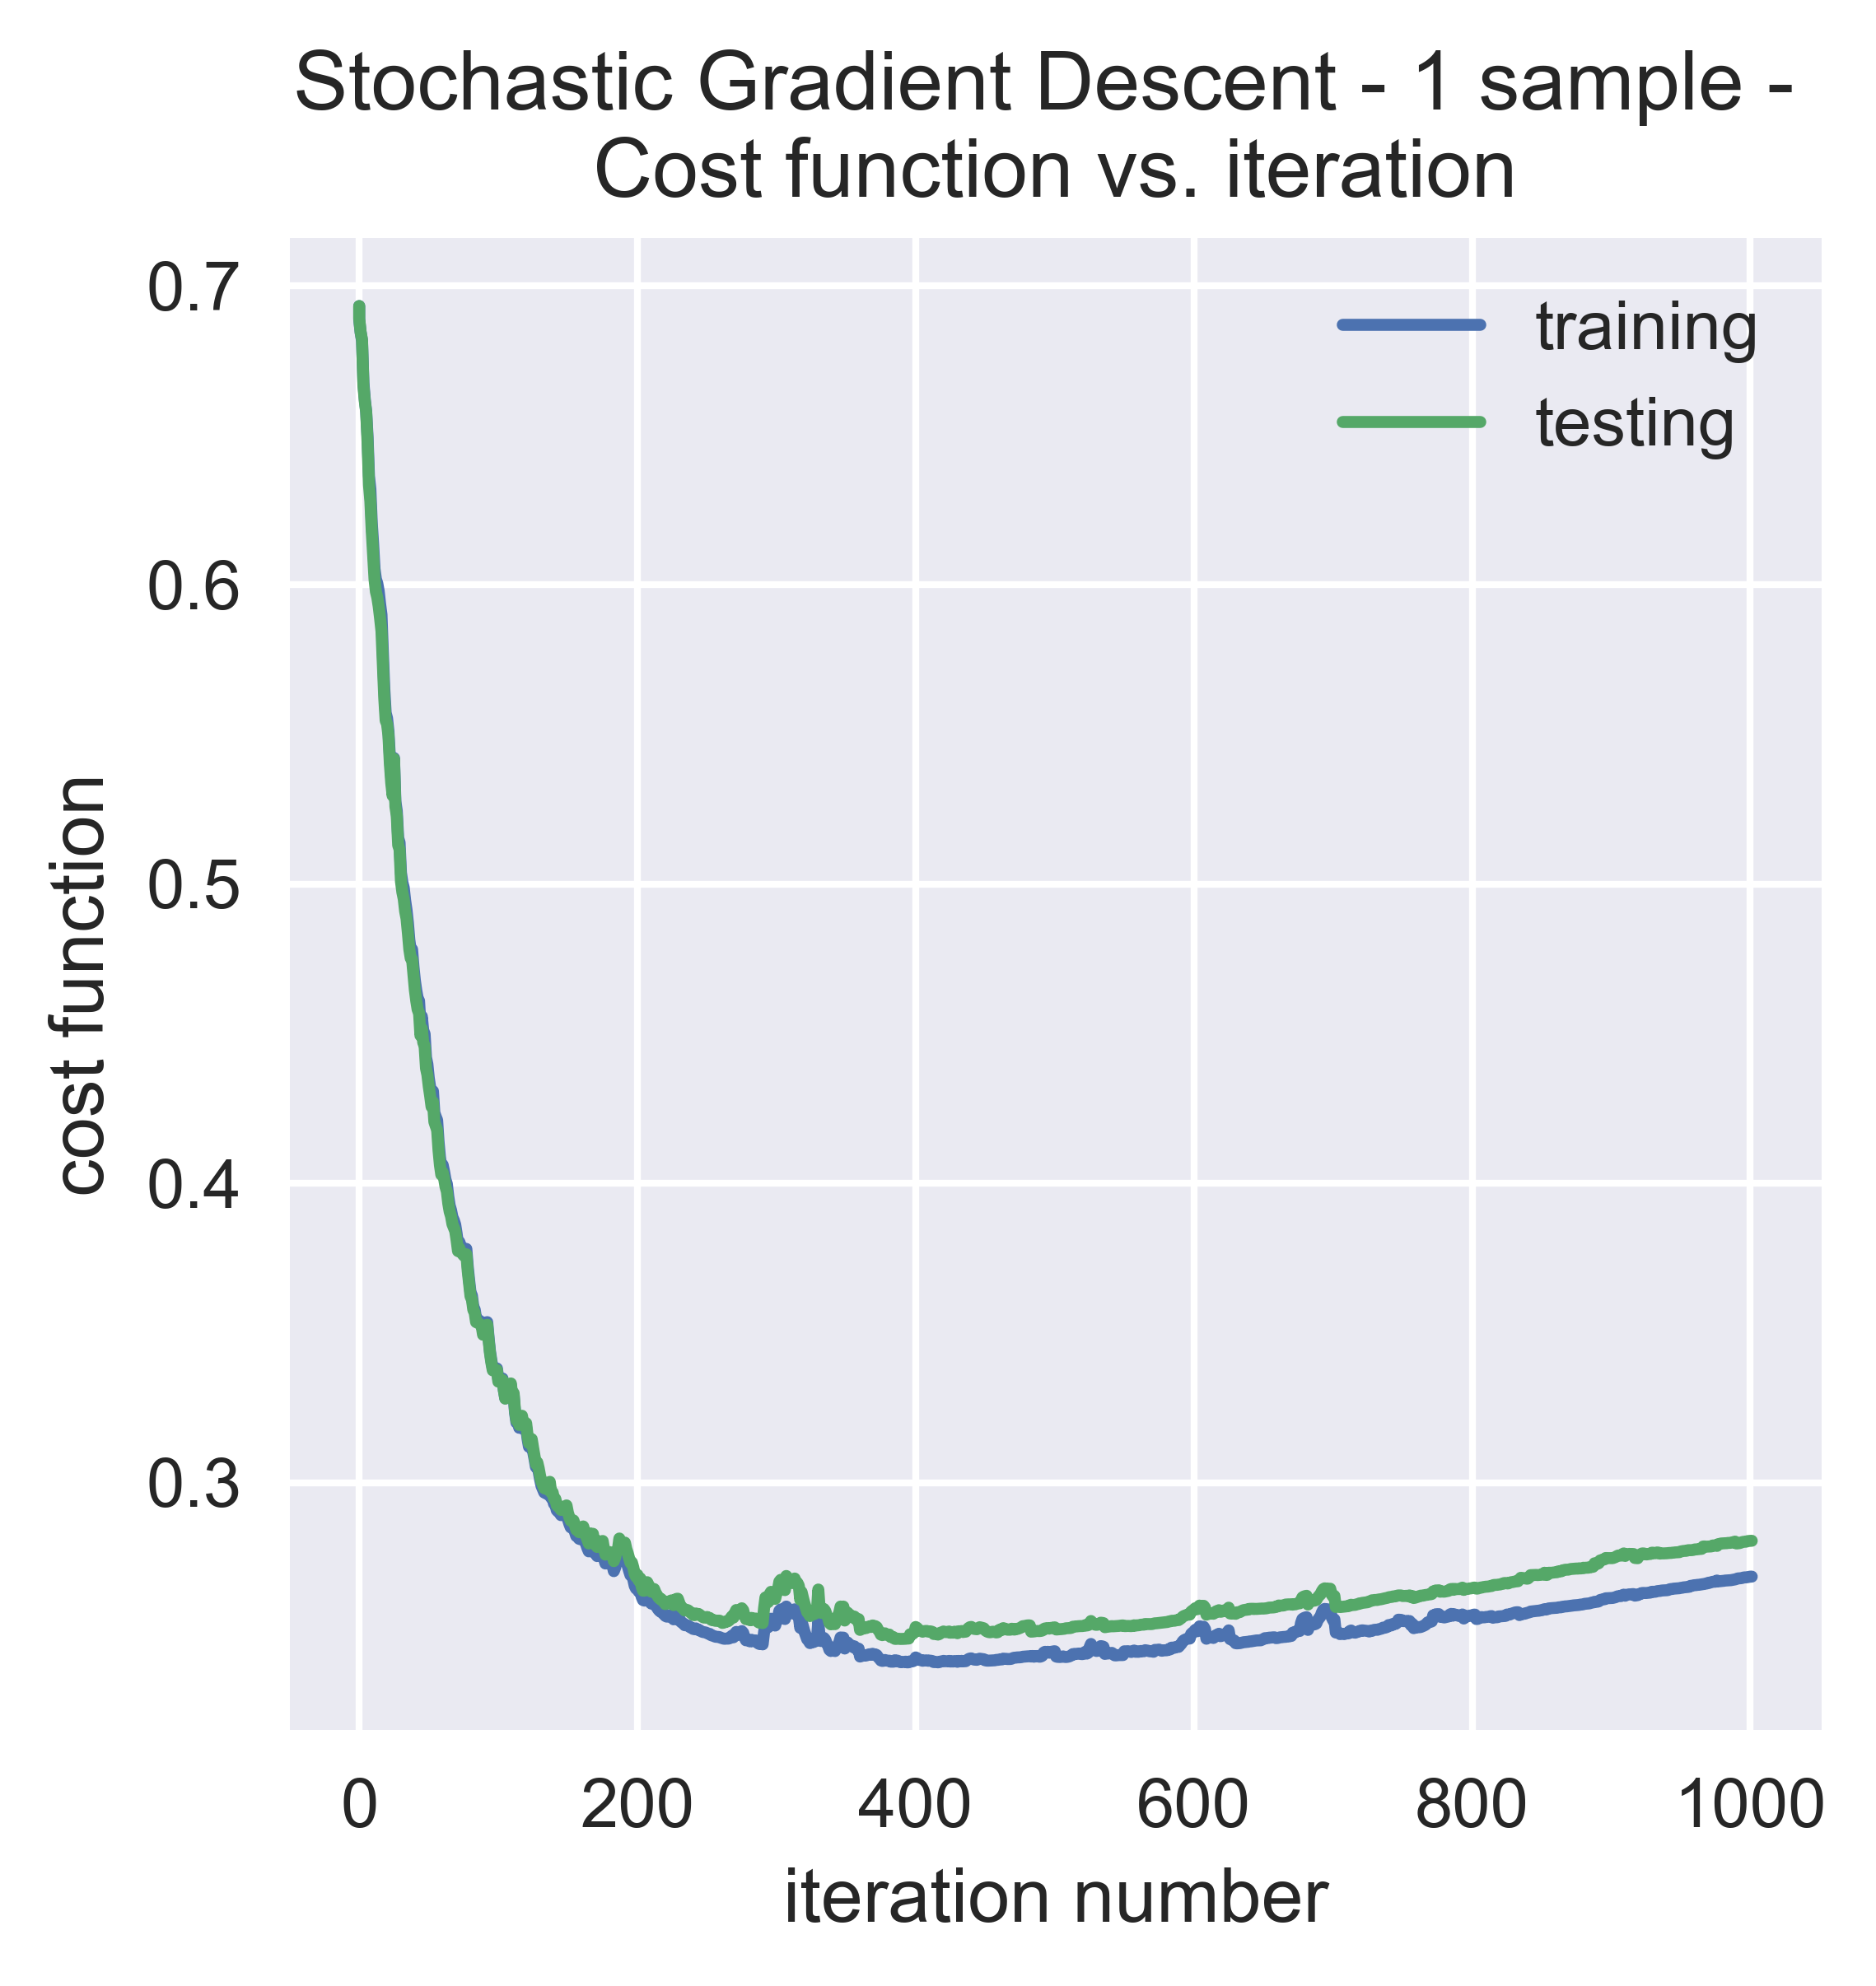

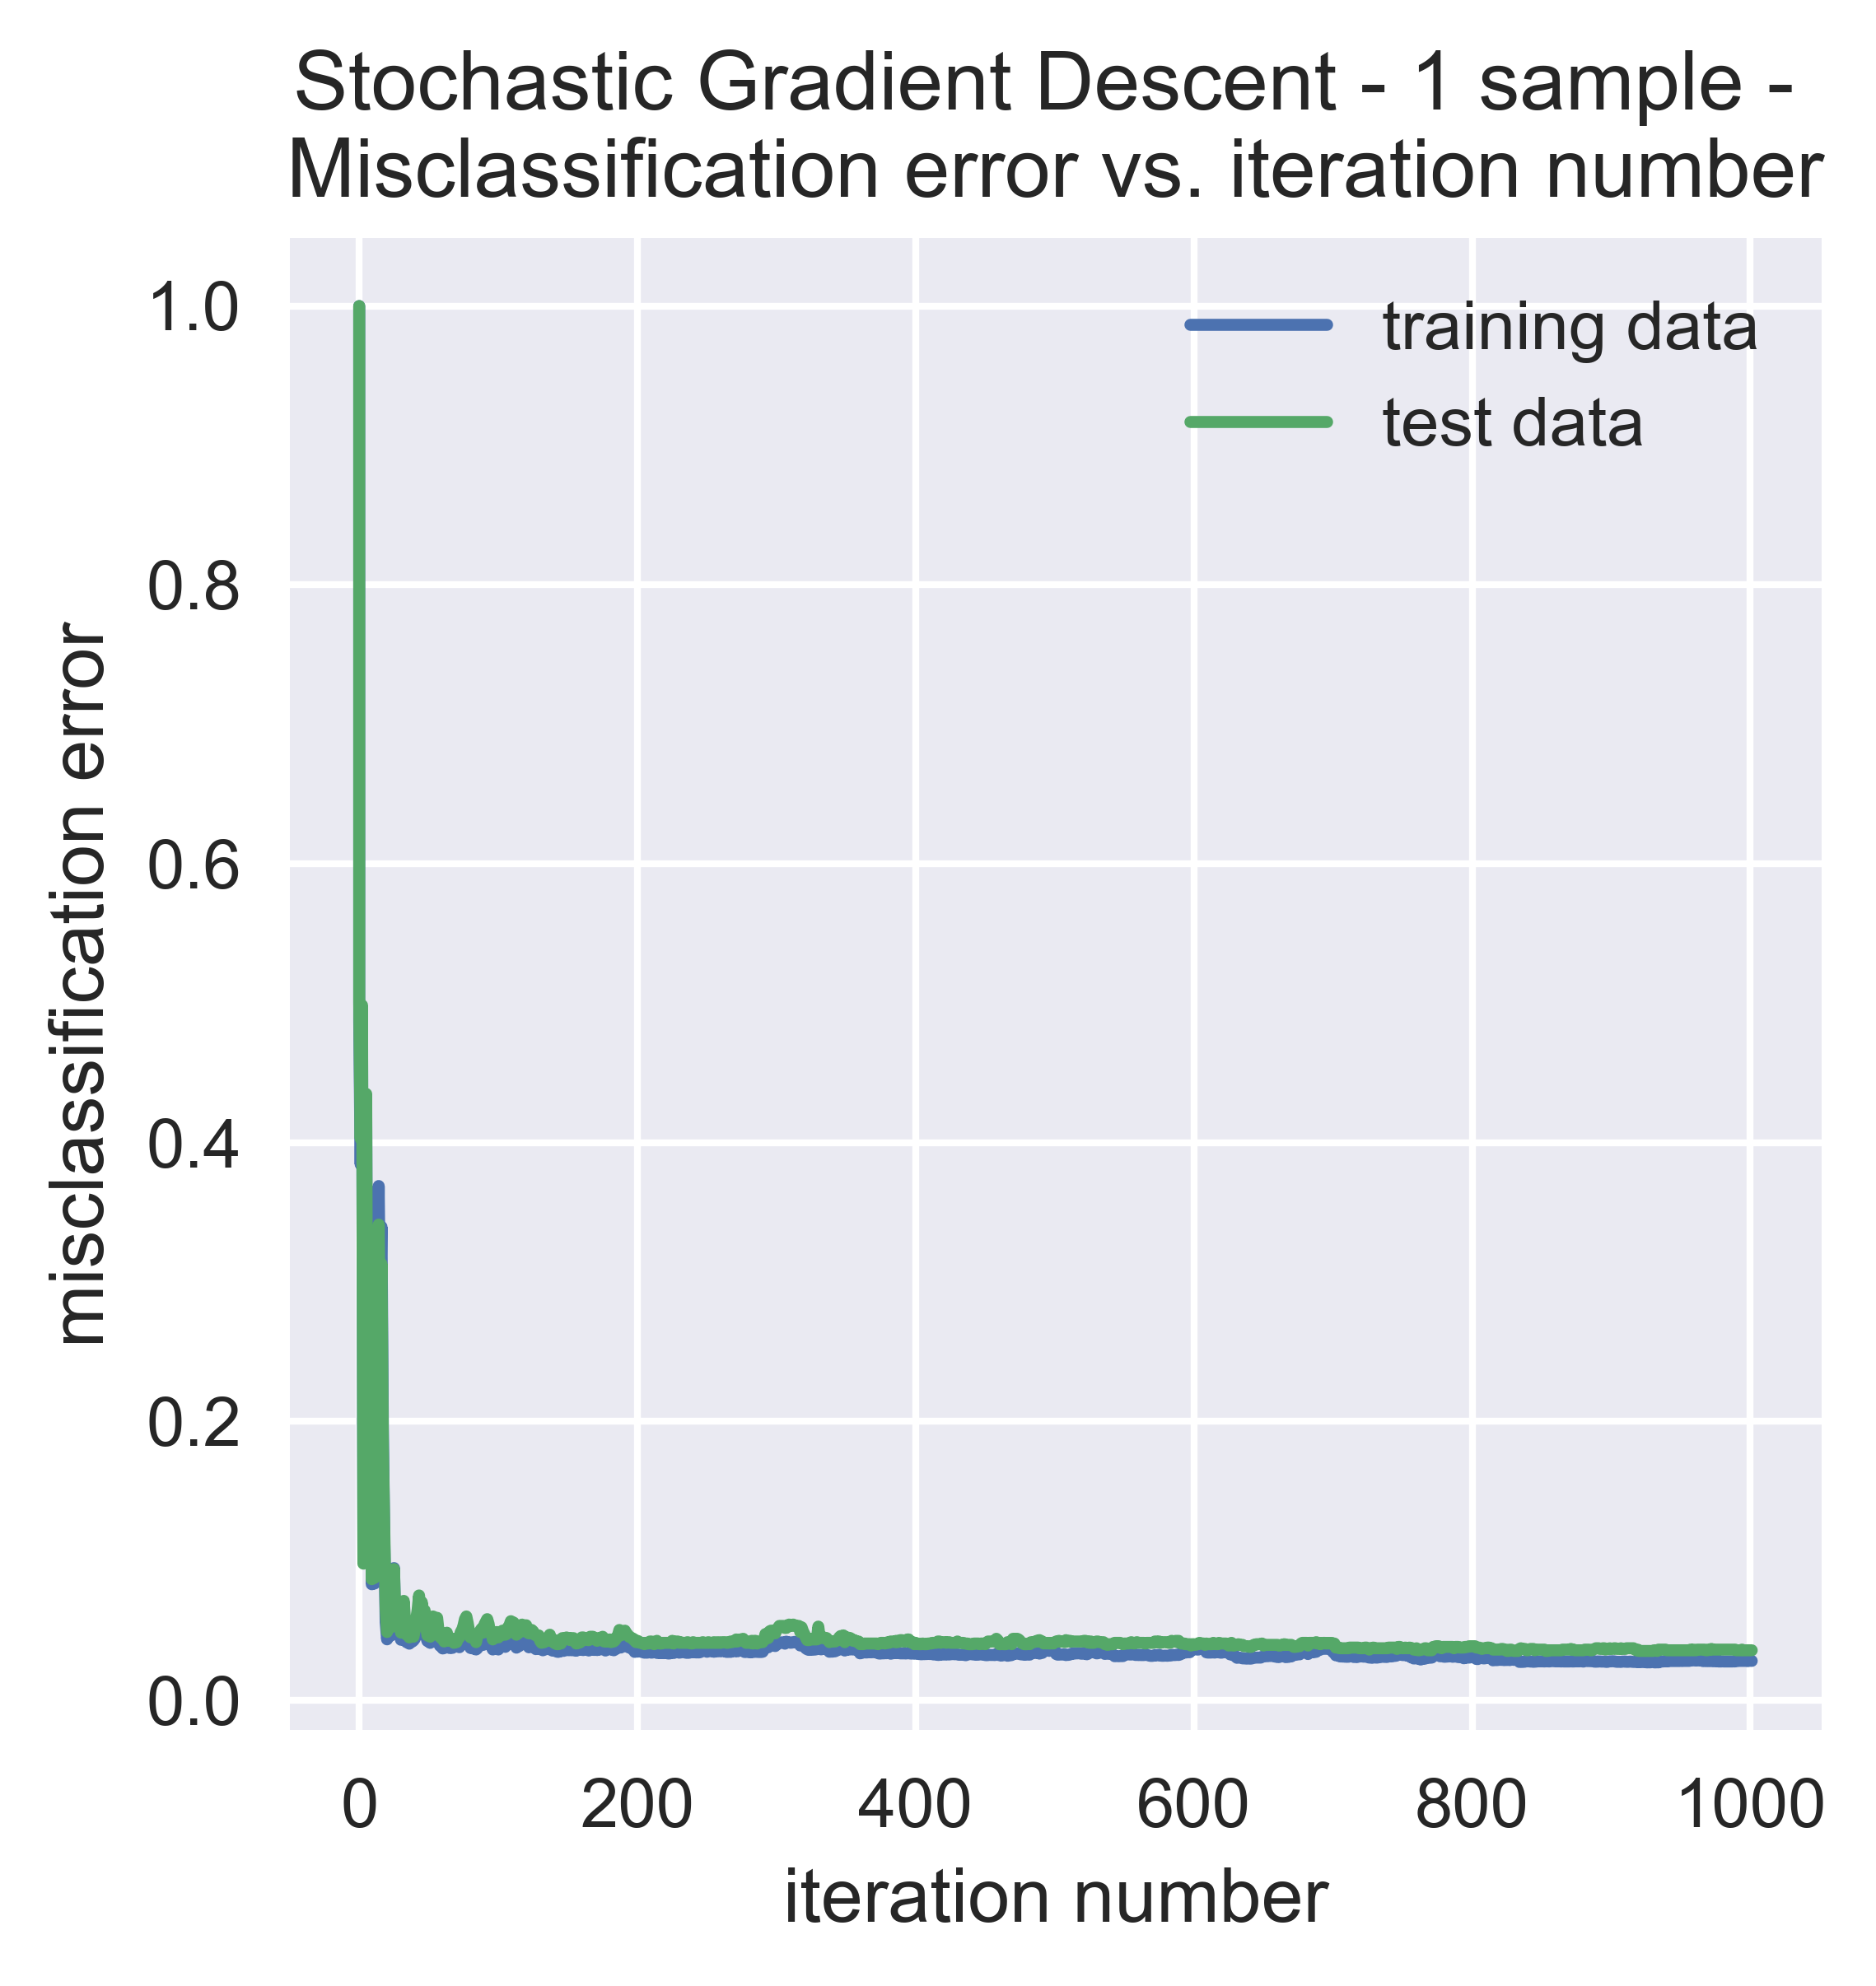

In [15]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Stochastic Gradient Descent - 1 sample - \n')

### stochastic gradient descent - batch size 100

In [72]:
batch_size = 100
#batch_size = 12223
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = SGD(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val,batch_size)

the value of j train is 0.6931471805599452
the value of j train is 0.6081975583564165
the value of j train is 0.5487600975442805
the value of j train is 0.49481493149647254
the value of j train is 0.4567255413870483
the value of j train is 0.42474695420084474
the value of j train is 0.39820807399587027
the value of j train is 0.3791978290636593
the value of j train is 0.3569286866941225
the value of j train is 0.3402950790423454
the value of j train is 0.32706369186502304
the value of j train is 0.3153949994827906
the value of j train is 0.30527319885673193
the value of j train is 0.2964623371384195
the value of j train is 0.2897953584885095
the value of j train is 0.2832803813705154
the value of j train is 0.27724684229863816
the value of j train is 0.2723326368532893
the value of j train is 0.2680561093922856
the value of j train is 0.2639938557442381
the value of j train is 0.2605642667625763
the value of j train is 0.2575824288119488
the value of j train is 0.2550313753831931
the v

the value of j train is 0.3294826266991363
the value of j train is 0.3301658120195353
the value of j train is 0.3304954439671874
the value of j train is 0.3305106063501022
the value of j train is 0.33127288991330117
the value of j train is 0.33201351442495913
the value of j train is 0.3326159265338945
the value of j train is 0.333369293378468
the value of j train is 0.33413622368059165
the value of j train is 0.3347009256581499
the value of j train is 0.335278225421234
the value of j train is 0.33596626490363757
the value of j train is 0.33651464221831545
the value of j train is 0.33738262529641183
the value of j train is 0.337684010150544
the value of j train is 0.33837915148055675
the value of j train is 0.3389459513593106
the value of j train is 0.3396191488179715
the value of j train is 0.3402674993953935
the value of j train is 0.3409119539471133
the value of j train is 0.34143458408470917
the value of j train is 0.3423378788943303
the value of j train is 0.3424342686923446
the va

the value of j train is 0.4360804034977831
the value of j train is 0.43643899063134345
the value of j train is 0.4365301248829705
the value of j train is 0.43684082578034544
the value of j train is 0.43696849337092747
the value of j train is 0.43715511977593147
the value of j train is 0.4377212438655308
the value of j train is 0.4382682710468798
the value of j train is 0.4386790533199847
the value of j train is 0.43829252829462356
the value of j train is 0.4388720239525048
the value of j train is 0.4392664334870018
the value of j train is 0.4397901754465222
the value of j train is 0.4402004285807881
the value of j train is 0.4405541954125604
the value of j train is 0.44111850607154746
the value of j train is 0.44138566133902657
the value of j train is 0.441929550205217
the value of j train is 0.4422766361363937
the value of j train is 0.4426275473613499
the value of j train is 0.44309866558753697
the value of j train is 0.44357681563653434
the value of j train is 0.44410545721704897
th

the value of j train is 0.5097991563553868
the value of j train is 0.510187420531482
the value of j train is 0.5107170492660549
the value of j train is 0.5111349228435794
the value of j train is 0.5116133749821274
the value of j train is 0.5119520256716701
the value of j train is 0.5121337732467056
the value of j train is 0.5124860513400806
the value of j train is 0.5129984328708029
the value of j train is 0.5133279009531354
the value of j train is 0.5136873753479925
the value of j train is 0.5139809255733292
the value of j train is 0.5139768294490727
the value of j train is 0.5143025254713237
the value of j train is 0.5148681863763085
the value of j train is 0.5153656605171936
the value of j train is 0.5156377312537885
the value of j train is 0.5160321317936103
the value of j train is 0.5164944071528418
the value of j train is 0.5165270809911097
the value of j train is 0.5165999675211703
the value of j train is 0.5169946523232111
the value of j train is 0.5175563427165306
the value of

KeyboardInterrupt: 

In [ ]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Stochastic Gradient Descent - 100 sample Batch - \n')

### newton's method 

In [18]:
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = newton_method(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val)

the value of j train is 0.6931471805599452
the value of j train is 0.27708419506447773
0.0134271437518
the value of j train is 0.23766775727977946
0.0052461701467
the value of j train is 0.23487475169931332
0.00173836919585


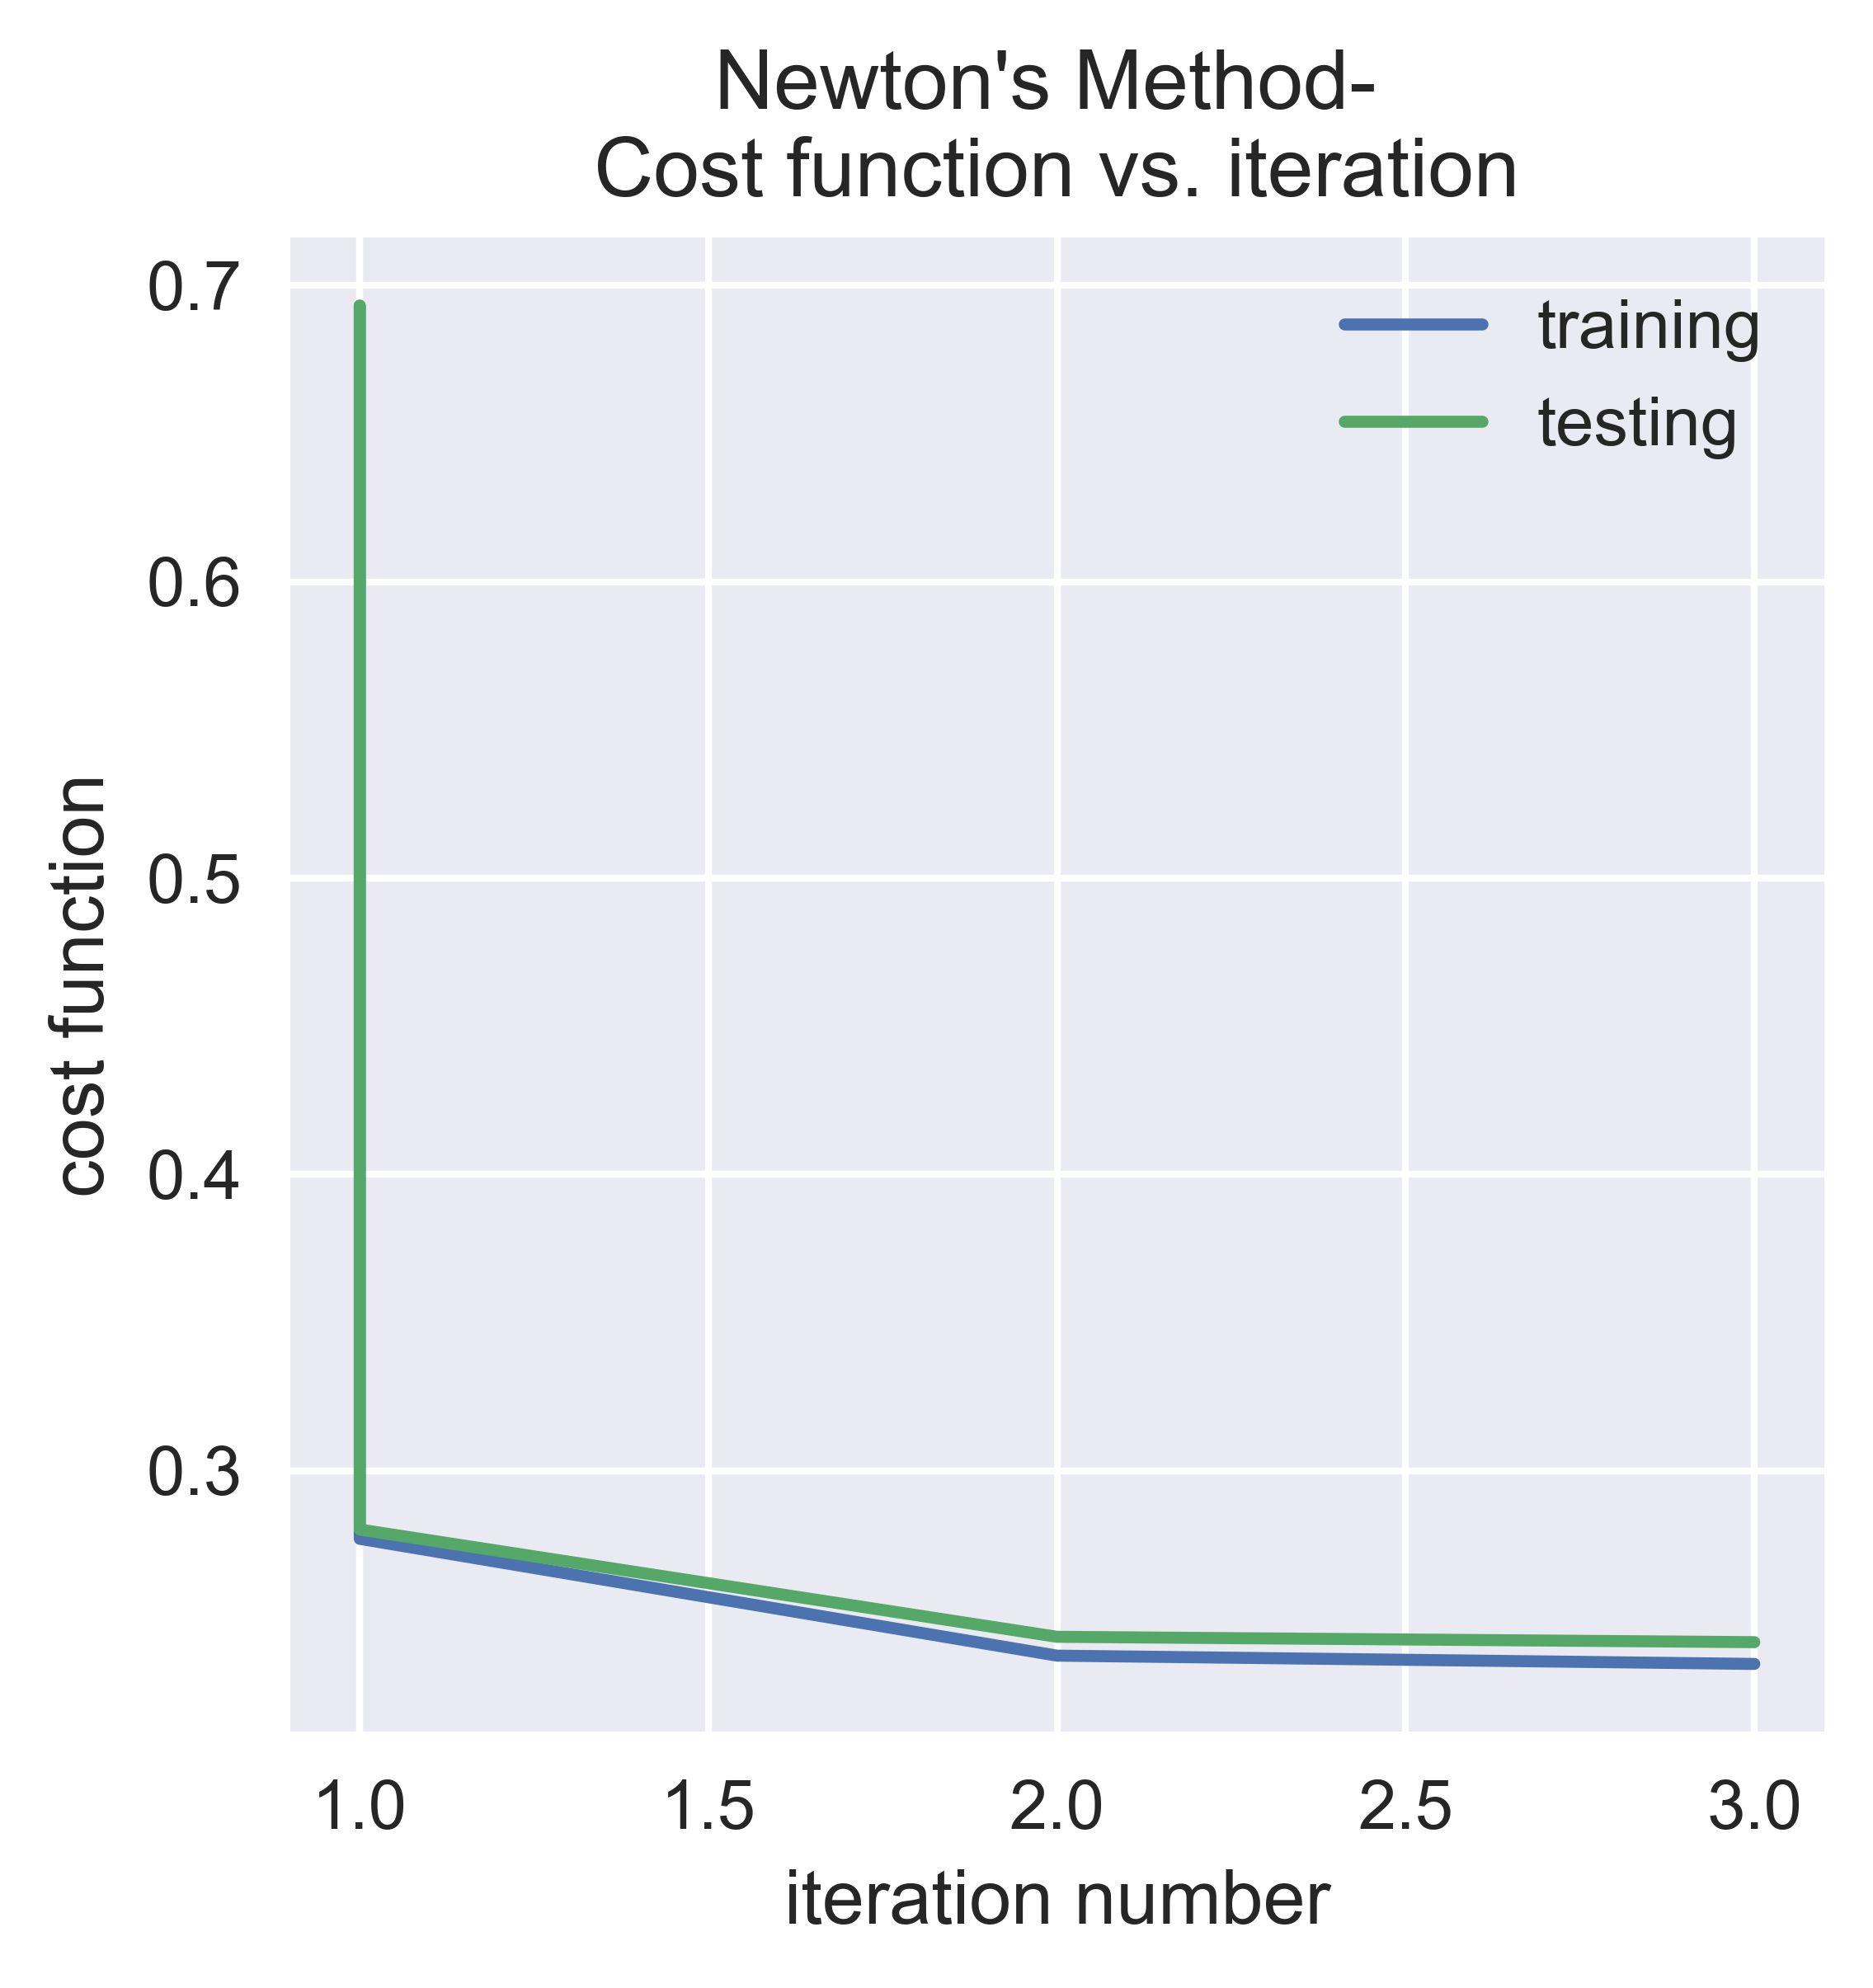

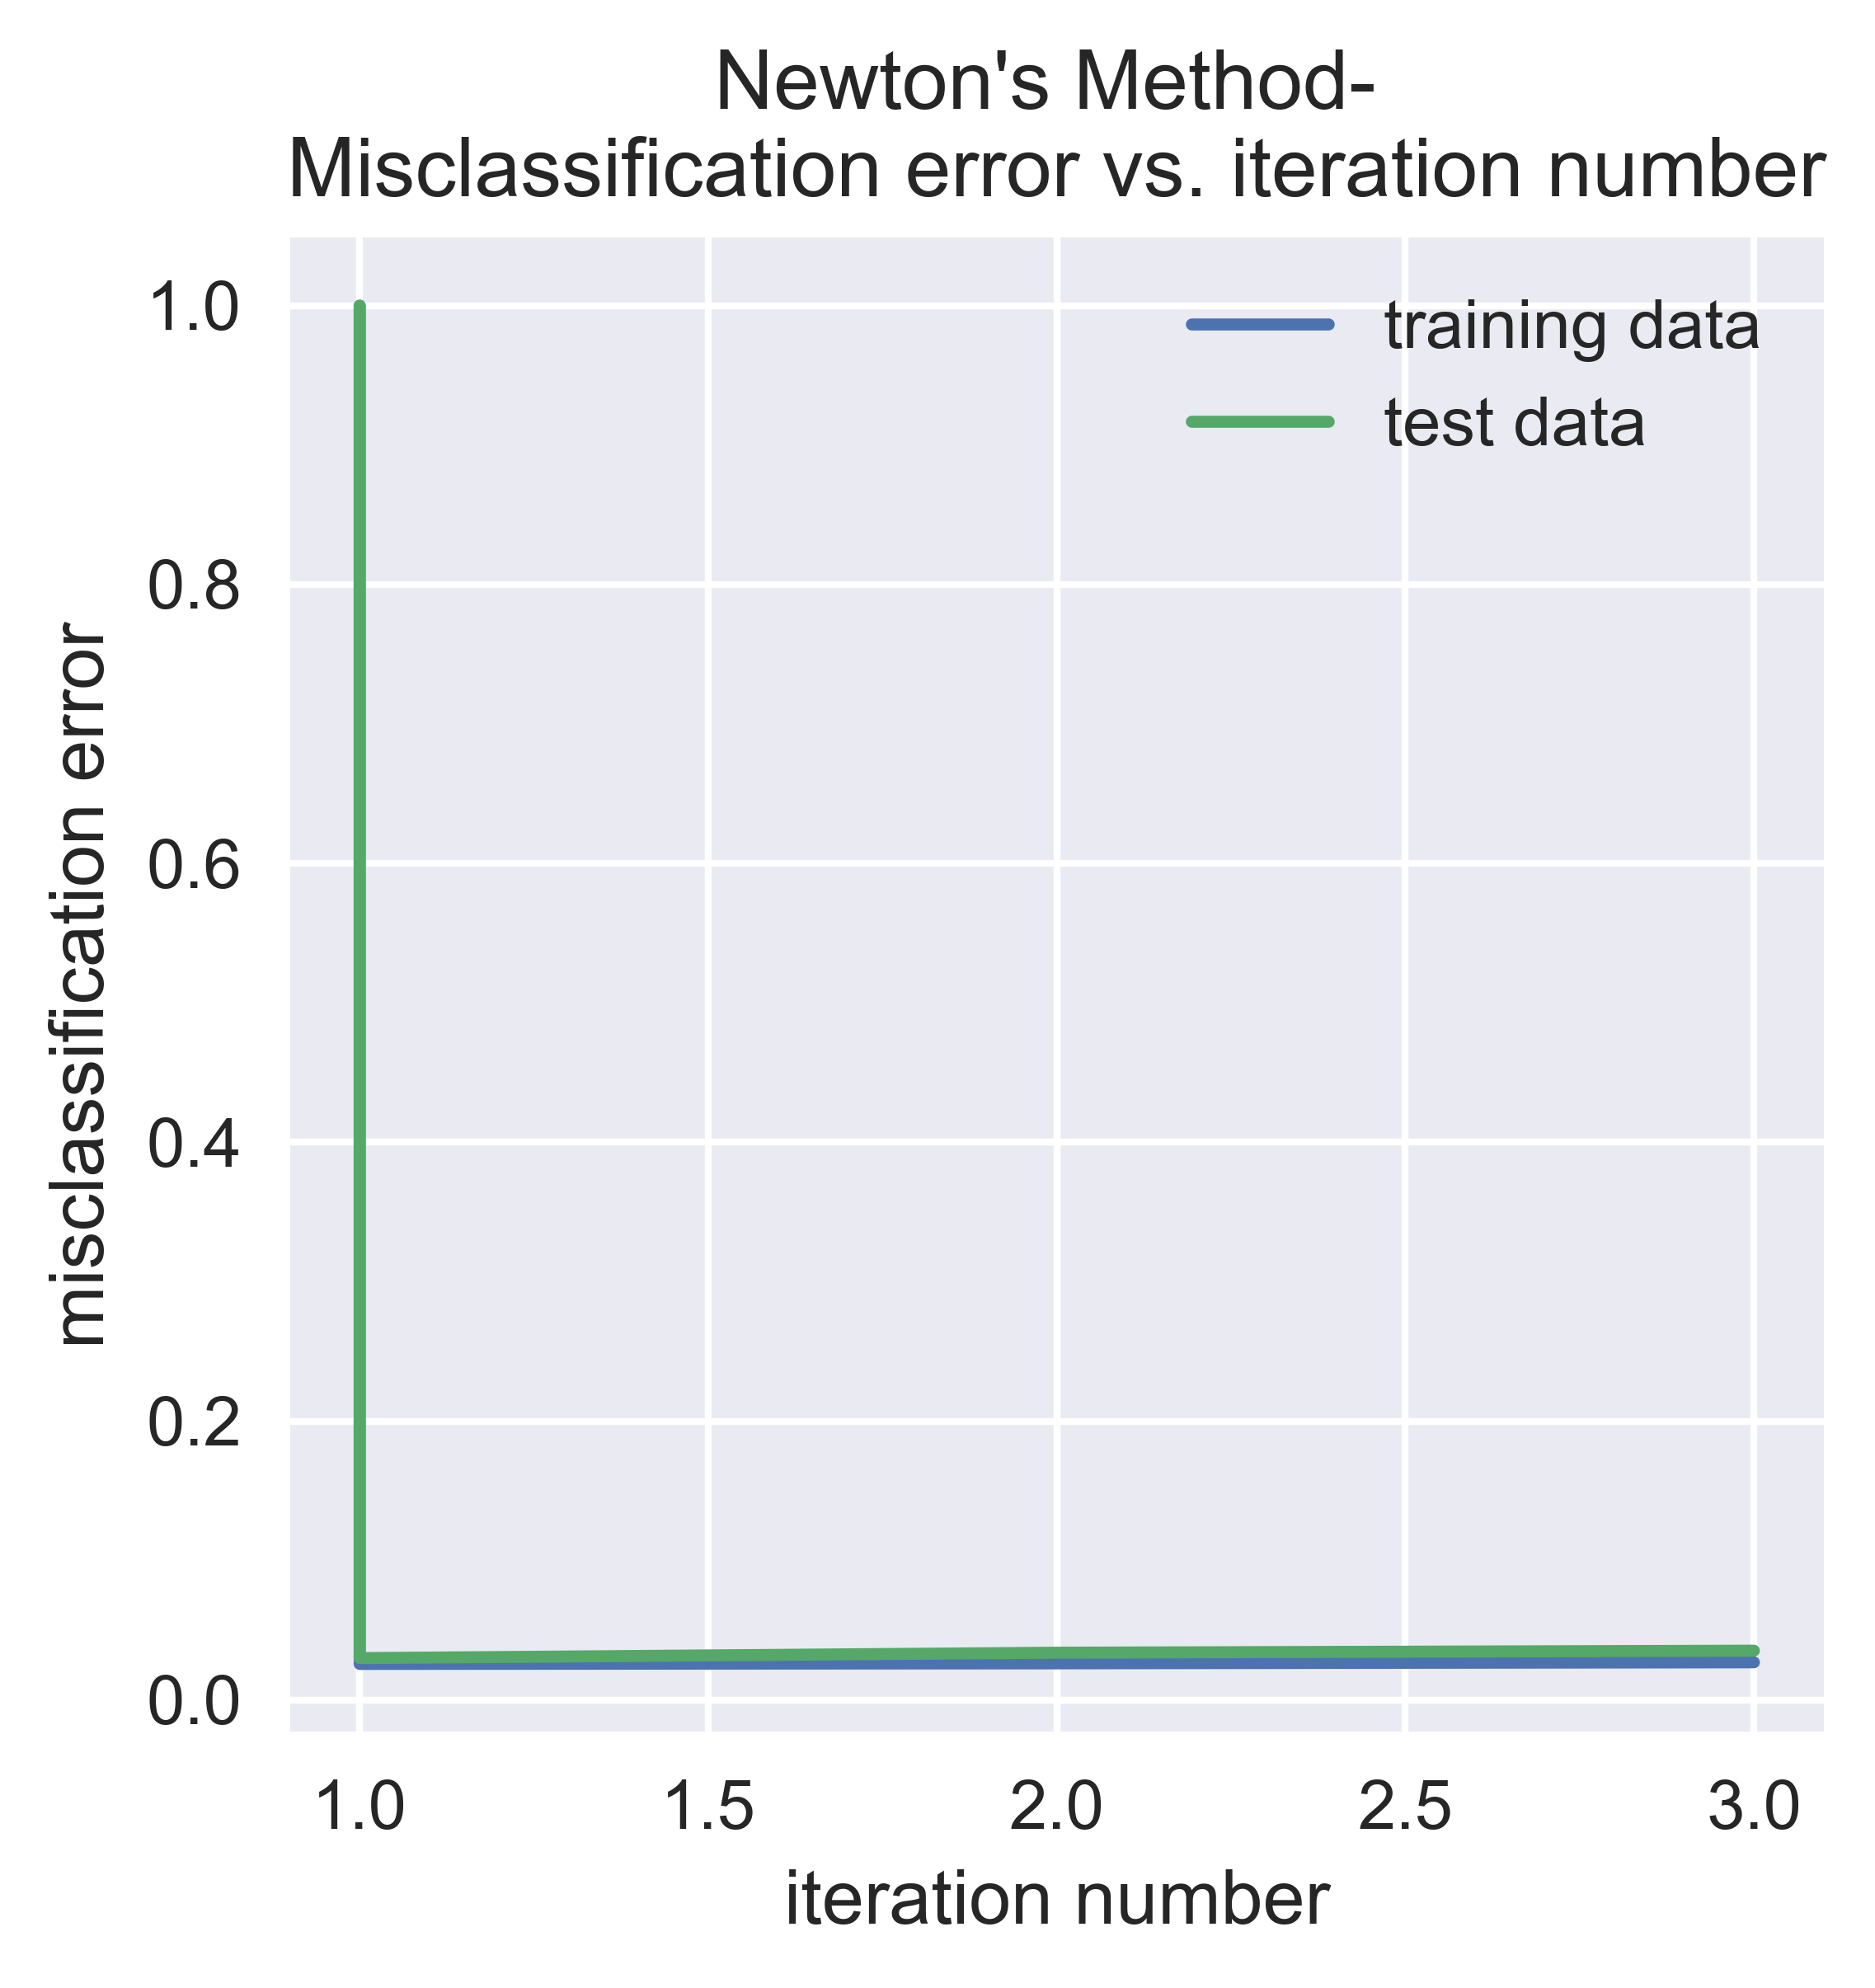

In [19]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Newton\'s Method- \n')

### batch

### this is scratch below here

In [ ]:
X = x_train_c
y = labels_train_c
X_test = x_test_c
y_test = labels_test_c

not_conv = True
j_train_vec = []
j_test_vec = []
w_vec = []
b_vec = []
k_vec = []
train_classify_vec = []
test_classify_vec = []

k = 0
#step_size = 1e-3
step_size = 5e-2
criteria_conv = 2e-4

w = np.zeros((np.shape(X)[1],))
b = 0
n = np.shape(X)[0]
#mu_vec = np.zeros((np.shape(X)[0],))
#cost_mu = np.zeros((np.shape(X)[0],))
#range_vec = np.arange(len(mu_vec))
j_prev = 0

while not_conv:
    ##### training part 
    #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
    #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
    mu_vec = 1/(1+np.exp(-y.T*(b+np.dot(X,w)))) 
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))
     
    #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
    #g_b = (1/n)*np.sum(mu_vec-y)
    
    g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
    g_b = (1/n)*np.sum(-y*(1-mu_vec))
    
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    ####### testing part
    
    mu_vec = 1/(1+np.exp(-y_test.T*(b+np.dot(X_test,w)))) 
    cost_mu = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))
    
    j_test = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)

    # 
    w_new = w - step_size*g_w
    b_new = b - step_size*g_b
    
    w_vec.append(w)
    b_vec.append(b)

    delta_w = np.abs(w-w_old)
    delta_b = np.abs(b-b_old)

    #w = np.array(w)
    w = copy.copy(w_new)
    b = copy.copy(b_new)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)
    
    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]
    
    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n
    
    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    # check convergence
    if ((1/n)*np.sum(delta_w))<criteria_conv and k>1:
        not_conv = False

    else:
        not_conv = True
        k += 1

    print('the value of j train is {}'.format(j_train))

    #print('the value of delta_w is {}'.format(delta_w))
    #print(mu_vec)
    #print(not_conv)


In [ ]:
plt.figure()
plt.plot(k_vec,j_train_vec,label='training')
plt.plot(k_vec,j_test_vec,label='testing')
plt.xlabel('iteration number')
plt.ylabel('cost function')
plt.title('Cost function vs. iteration')
plt.legend()
index = np.argmin(j_train_vec)
k_best = k_vec[index]
w_best = w_vec[index]


plt.figure()
plt.plot(k_vec,train_classify_vec,label='training data')
plt.plot(k_vec,test_classify_vec,label='test data')
plt.xlabel('iteration number')
plt.ylabel('misclassification error')
plt.title('Misclassification error vs. iteration number')
plt.legend()


In [ ]:
np.diag([1,2,3])

In [37]:
a= [1,2,3,4,5]

In [44]:
a[:-2]

[1, 2, 3]

In [68]:
?np.random.choice

In [89]:
a = [1,2,3,4,5,6,7]
i = 1
batch_size = 4

In [90]:
a[i:i+batch_size]

[2, 3, 4, 5]